In [3]:
import pandas as pd
from google.colab import files
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#uploaded = files.upload()

In [4]:
import io

#data = pd.read_csv(io.BytesIO(uploaded['DUMD_train.csv']))
data = pd.read_csv("./DUMD_train.csv")
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium


In [5]:
from sklearn.preprocessing import label_binarize
arr=label_binarize(data['UNS'],classes=['High','Low','Medium','Very Low'],neg_label=0, pos_label=1,)
print(arr)

[[0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 ...
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]]


In [6]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()



data['UNS'] = Encoder.fit_transform(data['UNS'])

data.head()

#data.describe()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2


In [7]:
from sklearn.preprocessing import label_binarize
arr=label_binarize(data['UNS'],classes=[0,1,2,3],neg_label=0, pos_label=1)
print(arr)
data['VeryLow']=arr[:,3:]
data['Low']=arr[:,1:2]
data['Medium']=arr[:,2:3]
data['High']=arr[:,0:1]



[[0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 ...
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]]


In [8]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS,VeryLow,Low,Medium,High
0,0.00,0.00,0.00,0.00,0.00,3,1,0,0,0
1,0.08,0.08,0.10,0.24,0.90,0,0,0,0,1
2,0.10,0.10,0.15,0.65,0.30,2,0,0,1,0
3,0.08,0.08,0.08,0.98,0.24,1,0,1,0,0
4,0.09,0.15,0.40,0.10,0.66,2,0,0,1,0


In [9]:
from sklearn import svm

rbf1 = svm.SVC(kernel='linear', gamma=1.0, C=1.0,probability=True).fit(data[['LPR','PEG']], data['VeryLow'])
print(rbf1.classes_)

[0 1]


In [10]:
from sklearn import svm

rbf2 = svm.SVC(kernel='linear', gamma=1.0, C=1.0,probability=True).fit(data[['LPR','PEG']], data.Low.values)

In [11]:
from sklearn import svm

rbf3 = svm.SVC(kernel='linear', gamma=1.0, C=1.0,probability=True).fit(data[['LPR','PEG']], data.Medium.values)

In [12]:
from sklearn import svm

rbf4 = svm.SVC(kernel='linear', gamma=1.0, C=1.0,probability=True).fit(data[['LPR','PEG']], data.High.values)

In [13]:
#uploaded = files.upload()

#test_data = pd.read_csv(io.BytesIO(uploaded['DUMD_test.csv']))
test_data=pd.read_csv("./DUMD_test.csv")
test_data.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High


In [14]:
test_data['UNS'].value_counts()


Low         26
Medium      22
High        21
Very Low    11
Name: UNS, dtype: int64

In [15]:
Encoder2 = LabelEncoder()
test_data['UNS'] = Encoder2.fit_transform(test_data['UNS'])

test_data.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0


In [16]:
#0=high,1=low,2=medium,verylow=3
arr=label_binarize(test_data['UNS'],classes=[0,1,2,3])
print(arr)
test_data['VeryLow']=arr[:,3:]
test_data['Low']=arr[:,1:2]
test_data['Medium']=arr[:,2:3]
test_data['High']=arr[:,0:1]

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]


In [17]:
test_data['UNS'].value_counts()

1    26
2    22
0    21
3    11
Name: UNS, dtype: int64

In [18]:
test_data.head()

,STG,SCG,STR,LPR,PEG,UNS,VeryLow,Low,Medium,High
0,0.420,0.290,0.140,0.03,0.68,2,0,0,1,0
1,0.100,0.100,0.520,0.78,0.34,2,0,0,1,0
2,0.510,0.255,0.550,0.17,0.64,2,0,0,1,0
3,0.250,0.540,0.310,0.25,0.08,3,1,0,0,0
4,0.258,0.250,0.295,0.33,0.77,0,0,0,0,1


In [19]:
pred1 = rbf1.predict(test_data[['LPR','PEG']])
print(pred1)
print(type(pred1))



[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [20]:
print(test_data['VeryLow'].to_numpy())
print(type(test_data['VeryLow']))


[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 0]
<class 'pandas.core.series.Series'>


In [21]:
accuracy1 = accuracy_score(test_data['VeryLow'], pred1)
print(accuracy1)

0.9375


In [22]:
cf_matrix=confusion_matrix(test_data.VeryLow.values, pred1)
print(cf_matrix)

[[69  0]
 [ 5  6]]


In [23]:
_unique, _counts = np.unique(test_data.VeryLow.values, return_counts=True)
_unique=['REST','VERYLOW']
print('                Test Data:',dict(zip(_unique, _counts)))

unique, counts = np.unique(pred1, return_counts=True)
unique=['REST','VERYLOW']
print('Predicted by Perceptron :',dict(zip(unique, counts)))


                Test Data: {'REST': 69, 'VERYLOW': 11}
Predicted by Perceptron : {'REST': 74, 'VERYLOW': 6}


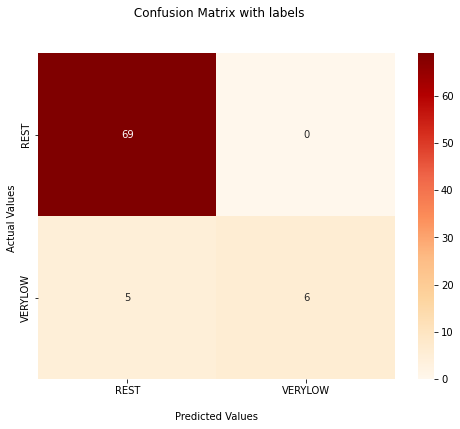

In [24]:
plt.figure(figsize = (8,6))

ax = sns.heatmap(cf_matrix, annot=True, cmap='OrRd')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['REST','VERYLOW'])
ax.yaxis.set_ticklabels(['REST','VERYLOW'])                       
## Display the visualization of the Confusion Matrix.

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


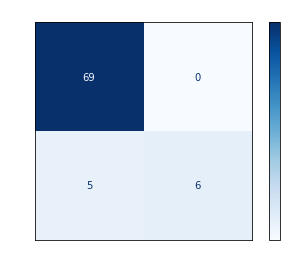

In [25]:
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(rbf1, test_data[['LPR','PEG']], test_data['VeryLow'], cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [26]:
print(rbf1.predict_proba(test_data[['LPR','PEG']]))
print(rbf1.predict_proba(test_data[['LPR','PEG']]).shape)


[[9.99990028e-01 9.97230713e-06]
 [9.99962932e-01 3.70675186e-05]
 [9.99993763e-01 6.23672847e-06]
 [1.63004739e-02 9.83699526e-01]
 [9.99999900e-01 1.00000010e-07]
 [9.99999900e-01 1.00000010e-07]
 [9.99957111e-01 4.28892836e-05]
 [9.99999900e-01 1.00000010e-07]
 [9.80140954e-01 1.98590459e-02]
 [9.99997970e-01 2.02953448e-06]
 [9.99966297e-01 3.37034846e-05]
 [9.99433158e-01 5.66841517e-04]
 [9.99999900e-01 1.00000010e-07]
 [5.93532512e-02 9.40646749e-01]
 [9.99999900e-01 1.00000010e-07]
 [9.97467619e-01 2.53238103e-03]
 [9.99984355e-01 1.56448284e-05]
 [9.99999900e-01 1.00000010e-07]
 [9.81937431e-01 1.80625688e-02]
 [9.99996650e-01 3.34971736e-06]
 [8.73465039e-01 1.26534961e-01]
 [9.68135922e-01 3.18640778e-02]
 [9.99997637e-01 2.36323167e-06]
 [9.99987628e-01 1.23723258e-05]
 [9.99993270e-01 6.72994932e-06]
 [9.91605246e-01 8.39475427e-03]
 [9.99977255e-01 2.27452599e-05]
 [9.99999900e-01 1.00000010e-07]
 [9.99819017e-01 1.80983142e-04]
 [9.99999900e-01 1.00000010e-07]
 [9.999999

In [27]:
pred2 = rbf2.predict(test_data[['LPR','PEG']])
print(pred2)



[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 0 1]


In [28]:
accuracy2 = accuracy_score(test_data.Low.values, pred2)
print(accuracy2)

0.8


In [29]:
cf_matrix=confusion_matrix(test_data.Low.values, pred2)
print(cf_matrix)

[[40 14]
 [ 2 24]]


In [30]:
_unique, _counts = np.unique(test_data.Low.values, return_counts=True)

_unique=['REST','LOW']
print('        Test Data:',dict(zip(_unique, _counts)))

unique, counts = np.unique(pred2, return_counts=True)
unique=['REST','LOW']
print('Predicted by SVM :',dict(zip(unique, counts)))


        Test Data: {'REST': 54, 'LOW': 26}
Predicted by SVM : {'REST': 42, 'LOW': 38}


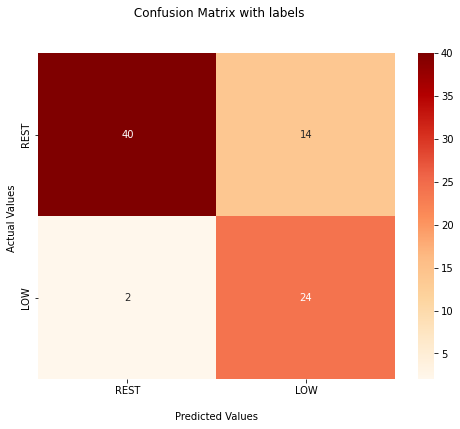

In [31]:
plt.figure(figsize = (8,6))

ax = sns.heatmap(cf_matrix, annot=True, cmap='OrRd')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['REST','LOW'])
ax.yaxis.set_ticklabels(['REST','LOW'])                       
## Display the visualization of the Confusion Matrix.

plt.show()

In [32]:
pred3 = rbf3.predict(test_data[['LPR','PEG']])
print(pred3)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [33]:
accuracy3 = accuracy_score(test_data.Medium.values, pred3)
print(accuracy3)

0.725


In [34]:
cf_matrix=confusion_matrix(test_data.Medium.values, pred3)
print(cf_matrix)

[[58  0]
 [22  0]]


In [35]:
_unique, _counts = np.unique(test_data.Medium.values, return_counts=True)

_unique=['REST','MEDIUM']
print('                Test Data:',dict(zip(_unique, _counts)))

unique, counts = np.unique(pred3, return_counts=True)
unique=['REST','MEDIUM']

print('Predicted by Perceptron :',dict(zip(unique, counts)))


                Test Data: {'REST': 58, 'MEDIUM': 22}
Predicted by Perceptron : {'REST': 80}


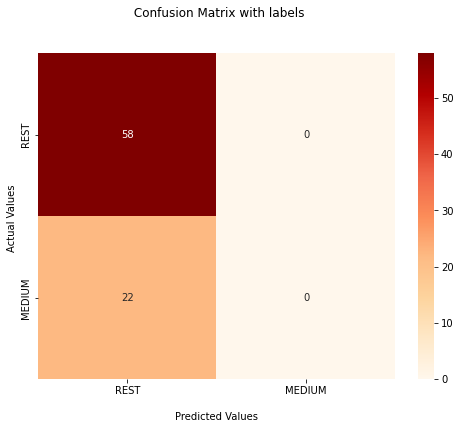

In [36]:
plt.figure(figsize = (8,6))

ax = sns.heatmap(cf_matrix, annot=True, cmap='OrRd')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['REST','MEDIUM'])
ax.yaxis.set_ticklabels(['REST','MEDIUM'])                       
## Display the visualization of the Confusion Matrix.

plt.show()

In [37]:
pred4 = rbf4.predict(test_data[['LPR','PEG']])
print(pred4)



[0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0]


In [38]:
accuracy4 = accuracy_score(test_data.High.values, pred4)
print(accuracy4)

1.0


In [39]:
cf_matrix=confusion_matrix(test_data.High.values, pred4)
print(cf_matrix)

[[59  0]
 [ 0 21]]


In [40]:
_unique, _counts = np.unique(test_data.High.values, return_counts=True)

_unique=['REST','HIGH']
print('                Test Data:',dict(zip(_unique, _counts)))

unique, counts = np.unique(pred4, return_counts=True)
unique=['REST','HIGH']
print('Predicted by Perceptron :',dict(zip(unique, counts)))


                Test Data: {'REST': 59, 'HIGH': 21}
Predicted by Perceptron : {'REST': 59, 'HIGH': 21}


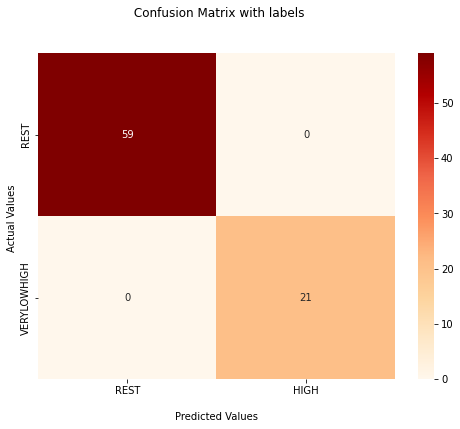

In [41]:
plt.figure(figsize = (8,6))

ax = sns.heatmap(cf_matrix, annot=True, cmap='OrRd')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['REST','HIGH'])
ax.yaxis.set_ticklabels(['REST','VERYLOWHIGH'])                       
## Display the visualization of the Confusion Matrix.

plt.show()

In [42]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(test_data.VeryLow.values, pred1)
print(accuracy1)

0.9375


In [43]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [44]:
import matplotlib.pyplot as plt
def draw_decisionsurface(clf, y):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting.
    X0, X1 = test_data['PEG'], test_data['LPR']
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('PEG')
    ax.set_xlabel('LPR')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


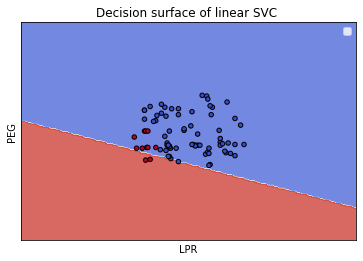

In [45]:
draw_decisionsurface(rbf1,test_data.VeryLow.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


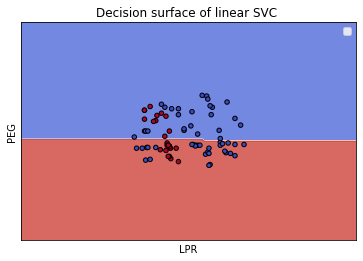

In [46]:
draw_decisionsurface(rbf2,test_data.Low.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


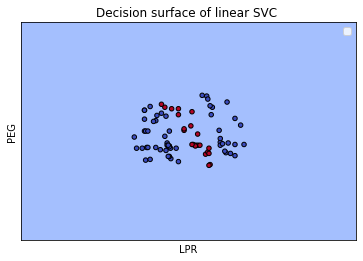

In [47]:
draw_decisionsurface(rbf3,test_data.Medium.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


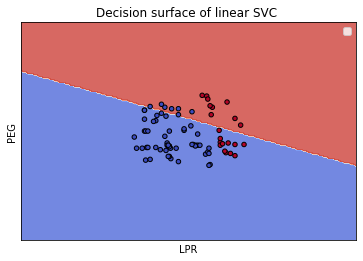

In [48]:
draw_decisionsurface(rbf4,test_data.High.values)

In [49]:

accuracy2 = accuracy_score(test_data.Low.values, pred2)
print(accuracy2)

0.8


In [50]:

accuracy3 = accuracy_score(test_data.Medium.values, pred3)
print(accuracy3)

0.725


In [51]:

accuracy4 = accuracy_score(test_data.High.values, pred4)
print(accuracy4)

1.0


In [52]:
a=rbf1.predict_proba(test_data[['LPR','PEG']])
print(a)


[[9.99990028e-01 9.97230713e-06]
 [9.99962932e-01 3.70675186e-05]
 [9.99993763e-01 6.23672847e-06]
 [1.63004739e-02 9.83699526e-01]
 [9.99999900e-01 1.00000010e-07]
 [9.99999900e-01 1.00000010e-07]
 [9.99957111e-01 4.28892836e-05]
 [9.99999900e-01 1.00000010e-07]
 [9.80140954e-01 1.98590459e-02]
 [9.99997970e-01 2.02953448e-06]
 [9.99966297e-01 3.37034846e-05]
 [9.99433158e-01 5.66841517e-04]
 [9.99999900e-01 1.00000010e-07]
 [5.93532512e-02 9.40646749e-01]
 [9.99999900e-01 1.00000010e-07]
 [9.97467619e-01 2.53238103e-03]
 [9.99984355e-01 1.56448284e-05]
 [9.99999900e-01 1.00000010e-07]
 [9.81937431e-01 1.80625688e-02]
 [9.99996650e-01 3.34971736e-06]
 [8.73465039e-01 1.26534961e-01]
 [9.68135922e-01 3.18640778e-02]
 [9.99997637e-01 2.36323167e-06]
 [9.99987628e-01 1.23723258e-05]
 [9.99993270e-01 6.72994932e-06]
 [9.91605246e-01 8.39475427e-03]
 [9.99977255e-01 2.27452599e-05]
 [9.99999900e-01 1.00000010e-07]
 [9.99819017e-01 1.80983142e-04]
 [9.99999900e-01 1.00000010e-07]
 [9.999999

In [53]:
import numpy as np
res=[]
for i in a:
  res.append(np.argmax(i))
  
print(res)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [54]:
print(pred1)

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0]


In [55]:
print(res-pred1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0]


In [56]:
print(accuracy_score(test_data.VeryLow.values,pred1))

0.9375


In [57]:
a1=rbf1.predict_proba(test_data[['LPR','PEG']])
a2=rbf2.predict_proba(test_data[['LPR','PEG']])
a3=rbf3.predict_proba(test_data[['LPR','PEG']])
a4=rbf4.predict_proba(test_data[['LPR','PEG']])


In [58]:
arr=np.vstack((a1[:,1],a2[:,1],a3[:,1],a4[:,1]))
print(arr.shape)

(4, 80)


In [59]:
print(arr.T)

[[9.97230713e-06 8.97640771e-02 3.18167805e-01 1.65434953e-02]
 [3.70675186e-05 3.94854278e-01 3.05930440e-01 1.02776565e-02]
 [6.23672847e-06 1.09618885e-01 3.16012264e-01 2.75834944e-02]
 [9.83699526e-01 7.33848619e-01 3.11399638e-01 1.00000010e-07]
 [1.00000010e-07 5.88813646e-02 3.14667548e-01 8.19335580e-01]
 [1.00000010e-07 1.04216816e-01 3.05594581e-01 9.94793972e-01]
 [4.28892836e-05 2.61102369e-01 3.10496410e-01 7.12386014e-03]
 [1.00000010e-07 4.02474679e-02 3.15245378e-01 9.60817886e-01]
 [1.98590459e-02 4.75936054e-01 3.10504543e-01 3.75759684e-05]
 [2.02953448e-06 1.53633038e-01 3.11922373e-01 8.21711163e-02]
 [3.37034846e-05 2.61097089e-01 3.10227872e-01 8.87631735e-03]
 [5.66841517e-04 4.62031689e-01 3.06952371e-01 9.47766340e-04]
 [1.00000010e-07 4.49023132e-02 3.16881581e-01 7.78125776e-01]
 [9.40646749e-01 6.88291729e-01 3.11516424e-01 1.18572485e-07]
 [1.00000010e-07 5.88844935e-02 3.15208927e-01 7.44845968e-01]
 [2.53238103e-03 4.21287893e-01 3.09815735e-01 2.267012

In [60]:
OVA_predict=np.argmax(arr.T,axis=1)
print(OVA_predict)

[2 1 2 0 3 3 2 3 1 2 2 1 3 0 3 1 1 3 1 2 1 1 2 2 2 1 2 3 1 3 3 3 3 3 1 3 1
 1 1 1 1 3 1 2 1 3 1 3 0 1 2 3 1 3 1 1 1 1 1 3 3 1 0 2 1 1 0 0 3 1 1 1 1 2
 2 2 1 0 3 1]


In [61]:
print(accuracy_score(test_data.UNS.values,OVA_predict))

0.525


In [62]:

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(test_data.UNS.values, OVA_predict)
print(cf_matrix)

[[ 0  0  0 21]
 [ 0 26  0  0]
 [ 0  5 16  1]
 [ 7  4  0  0]]


In [63]:
_unique, _counts = np.unique(test_data.UNS.values, return_counts=True)

_unique=['HIGH','LOW','MEDIUM','VERYLOW']
print('                Test Data:',dict(zip(_unique, _counts)))

unique, counts = np.unique(OVA_predict, return_counts=True)
unique=['HIGH','LOW','MEDIUM','VERYLOW']
print('Predicted by Perceptron :',dict(zip(unique, counts)))


                Test Data: {'HIGH': 21, 'LOW': 26, 'MEDIUM': 22, 'VERYLOW': 11}
Predicted by Perceptron : {'HIGH': 7, 'LOW': 35, 'MEDIUM': 16, 'VERYLOW': 22}


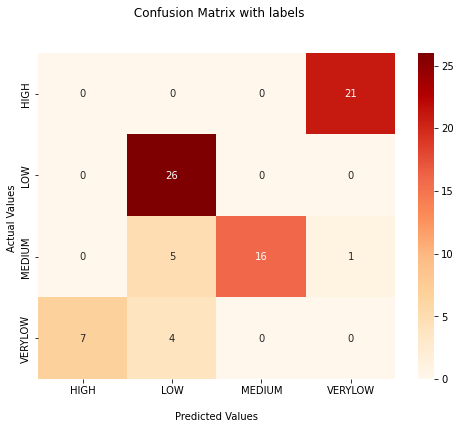

In [64]:
import seaborn as sns

plt.figure(figsize = (8,6))

ax = sns.heatmap(cf_matrix, annot=True, cmap='OrRd')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HIGH','LOW','MEDIUM','VERYLOW'])
ax.yaxis.set_ticklabels(['HIGH','LOW','MEDIUM','VERYLOW'])
## Display the visualization of the Confusion Matrix.

plt.show()

In [65]:
#data = pd.read_csv(io.BytesIO(uploaded['DUMD_train.csv']))
data = pd.read_csv("./DUMD_train.csv")
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium


In [70]:
X=data[['STG','SCG','STR','LPR','PEG']]
y=data['UNS']

In [71]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [72]:
svc = SVC()


In [73]:
o_vs_r = OneVsRestClassifier(svc)

In [74]:
o_vs_r.fit(X, y)

OneVsRestClassifier(estimator=SVC())

In [96]:
#uploaded = files.upload()

#test_data = pd.read_csv(io.BytesIO(uploaded['DUMD_test.csv']))
test_data=pd.read_csv("./DUMD_test.csv")
test_data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High


In [97]:
Xt=test_data[['STG',	'SCG','STR','LPR','PEG']]


In [98]:
yt=test_data['UNS']
Encoder2 = LabelEncoder()
test_data['UNS'] = Encoder2.fit_transform(test_data['UNS'])

test_data.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0


In [99]:
yhat = o_vs_r.predict(Xt)

In [100]:
print(accuracy_score(yt,yhat))

0.925


In [101]:
cf_matrix=confusion_matrix(yt, yhat)
print(cf_matrix)

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  2 20  0]
 [ 0  4  0  7]]


In [102]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


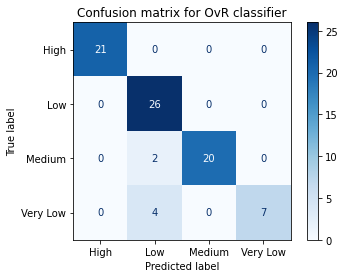

In [109]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(o_vs_r, Xt, yt,
                                 cmap=plt.cm.Blues)
plt.title('Confusion matrix for OvR classifier')
plt.show(matrix)
plt.show()
Xtt=Xt.to_numpy()
ytt=yt.to_numpy()

# Plot decision boundary
#plot_decision_regions(Xtt, np.array(test_data['UNS']), clf=o_vs_r, legend=2)
#plt.show()